In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])

In [3]:
W1 = tf.Variable(tf.random_normal(shape=[784, 256], stddev=0.01), name="w1val")
L1 = tf.nn.relu(tf.matmul(X, W1))

In [4]:
W2 = tf.Variable(tf.random_normal(shape=[256, 256], stddev=0.01), name="w2val")
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [5]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01), name="w3val")
model = tf.matmul(L2, W3)

In [6]:
param_list = [W1, W2, W3]
saver = tf.train.Saver(param_list)

In [7]:
im = Image.open("../넘파이 연습/temp.png")

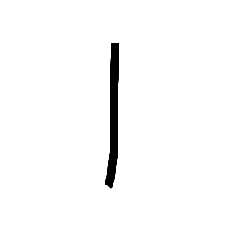

In [8]:
im

In [9]:
img2 = im.resize((28,28))
b = img2.tobytes("raw","A")
ll = [i/255 for i in b ]

In [10]:
len(ll)

784

In [11]:
ll = np.array(ll)
ll.shape

(784,)

In [12]:
ll = ll.reshape(1,784)
ll.shape

(1, 784)

In [13]:
with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())  #변수를 초기화 해서 세팅이되면 파일에서 restore시 에러발생함
    saver.restore(sess, "./chkp_save2/mnist")
    predict = sess.run([model], feed_dict={X:ll})
    print(predict)
    predict = np.array(predict)
    print("shape:", predict.shape)
    print("result : ",np.argmax(predict[0], axis=1))

INFO:tensorflow:Restoring parameters from ./chkp_save2/mnist
[array([[-5.79181337,  3.51141071, -0.54761112, -6.29235315, -0.39274356,
        -6.40812683, -4.68455982,  0.45978603, -1.22323465, -5.46019793]], dtype=float32)]
shape: (1, 1, 10)
result :  [1]
